# Oregon Partisanship

This notebook analyses the data from our partisan chain runs in the `or_precincts_neutral_chain.py` script.  In particular we look at congress (5 districts), projected congress 2020 (6 districts), state senate (30 districts), and state house (60 districts).

Each Markov chain was run for 100,000 recom steps.  The congressional chains were balanced within 1%, the state senate within 2%, and the state house within 10%.

In [1]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from gerrychain import Graph, Partition, Election
from gerrychain.updaters import Tally, cut_edges
import pickle
import pandas as pd

### Pull in Enacted Plan

In [2]:
with open("data/OR_precincts/OR_precinct_graph.p", "rb") as f_in:
    graph = pickle.load(f_in)

In [3]:
elections = [Election("GOV18", {"Dem": "GOV18D", "Rep": "GOV18R"}),
             Election("PRES16",{"Dem": "PRES16D","Rep":"PRES16R"}),
             Election("SEN16",{"Dem": "SEN16D","Rep":"SEN16R"}),
             Election("GOV16", {"Dem": "GOV16D", "Rep": "GOV16R"}),
             Election("AG16", {"Dem": "AG16D", "Rep": "AG16R"}),
             Election("SOS16", {"Dem": "SOS16D", "Rep": "SOS16R"}),
             Election("USH18", {"Dem": "USH18D", "Rep": "USH18R"}),
             Election("USH16", {"Dem": "USH16D", "Rep": "USH16R"})]


or_updaters = {"population" : Tally("TOTPOP", alias="population"), 
               "VAP": Tally("VAP"),
               "HVAP": Tally("HVAP"), 
               "HVAP_perc": lambda p: {k: (v / p["VAP"][k]) for k, v in p["HVAP"].items()},
               "ASIANVAP": Tally("ASIANVAP"), 
               "ASIANVAP_perc": lambda p: {k: (v / p["VAP"][k]) for k, v in p["ASIANVAP"].items()},
               "cut_edges": cut_edges}

election_updaters = {election.name: election for election in elections}
or_updaters.update(election_updaters)

In [4]:
enact_cong = Partition(graph, assignment="CD", updaters=or_updaters)
enact_sen = Partition(graph, assignment="SEND", updaters=or_updaters)
enact_house = Partition(graph, assignment="HDIST", updaters=or_updaters)

In [5]:
df = gpd.read_file("data/OR_precincts/OR_precincts.shp")

### Pull in Chain Results

In [6]:
partisan_cong = np.load("data/partisan_runs_all_elects/OR_congress_100000.p")
partisan_cong6 = np.load("data/partisan_runs_all_elects/OR_congress_2020_100000.p")
partisan_sen = np.load("data/partisan_runs_all_elects/OR_state_senate_100000.p")
# partisan_house_5 = np.load("data/partisan_runs_all_elects/OR_state_house_50000_blocks_5%.p")
partisan_house_2 = np.load("data/partisan_runs_all_elects/OR_state_house_50000_blocks_2%.p")

In [7]:
diff_c16_p16 = 0.5841456810181425 - enact_cong["PRES16"].percent("Dem")
diff_c16_s16 = 0.5841456810181425 - enact_cong["SEN16"].percent("Dem")
diff_c18_p16 = enact_cong["USH18"].percent("Dem") - enact_cong["PRES16"].percent("Dem")
diff_c18_s16 = enact_cong["USH18"].percent("Dem") - enact_cong["SEN16"].percent("Dem")

In [61]:
sum(df["USH16D"]) / (sum(df["USH16D"]) + sum(df["USH16R"]))

0.5593178056091321

In [63]:
d = list(map(lambda x: enact_cong["USH16"].count("Dem", x), ['01', '02', '03', '04', '05']))

In [65]:
r = list(map(lambda x: enact_cong["USH16"].count("Rep", x), ['01', '02', '03', '04', '05']))

In [52]:
wo3_r = list(map(lambda x: enact_cong["USH16"].count("Rep", x), ['01', '02', '04', '05']))

In [53]:
wo3_d = list(map(lambda x: enact_cong["USH16"].count("Dem", x), ['01', '02', '04', '05']))

In [48]:
## Exclude Indep Votes in District 3
enact_cong["USH16"].count("Dem") / (enact_cong["USH16"].count("Dem") + 
                                   sum([139814, 272952, 157743, 160508]))

0.5841456810181425

In [57]:
## Exclude all votes in district 3
sum(wo3_d) /(sum(wo3_d) + sum(wo3_r))

0.5073670831822672

In [70]:
[d[i] / (d[i] + r[i]) for i in range(5)]

[0.6176884773876354,
 0.2809332125018441,
 0.7783216524953054,
 0.5830996561575807,
 0.5544266409052044]

In [60]:
enact_cong["USH16"].count("Dem", '03') / (enact_cong["USH16"].count("Dem", '03') + enact_cong["USH16"].count("Rep", '03'))

0.7783216524953054

In [91]:
(enact_cong["PRES16"].count("Dem", '03') + enact_cong["PRES16"].count("Rep", '03'))*0.75

278355.75

In [90]:
(sum(wo3_d) + 278355.75) / (sum(wo3_d) + sum(wo3_r) + 371141)

0.5619132427943563

In [78]:
sum([225893, 106640, 264000.75, 220628, 199720]) /(sum(d) + sum(r))

0.5538876321627715

In [88]:
enact_cong["USH18"].count("Dem", '03') / (enact_cong["USH18"].count("Dem", '03') + enact_cong["USH18"].count("Rep", '03'))

0.7853260409434952

In [73]:
## Assume 75% support in district and equal turnout

print(np.mean([0.6176884773876354, 0.2809332125018441, 0.75,
               0.5830996561575807, 0.5544266409052044]))



0.557229597390453


In [96]:
len(np.unique(partisan_cong["partisan_gini_pres16"]))

99588

In [97]:
len(partisan_cong["partisan_gini_pres16"])

100000

In [102]:
len(np.unique(partisan_cong["mean_median_sen16"]))

99617

## Congressional (5 districts)

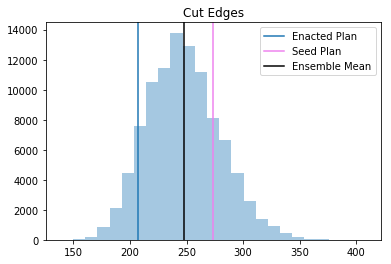

In [7]:
plt.title("Cut Edges")
sns.distplot(partisan_cong["cutedges"], kde=False, bins=25)
plt.axvline(x=len(enact_cong["cut_edges"]), label="Enacted Plan")
plt.axvline(x=partisan_cong["cutedges"][0], color="violet", label="Seed Plan")
plt.axvline(x=np.mean(partisan_cong["cutedges"]), color="k", label="Ensemble Mean")
plt.legend()
plt.savefig("plots/partisan_runs/congress/cut_edges_100000.png",
            bbox_inches="tight", dpi=200)
plt.show()

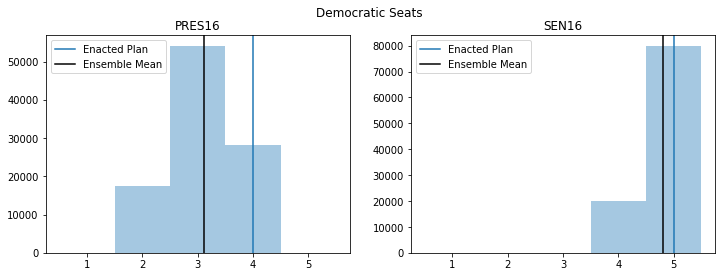

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
plt.suptitle("Democratic Seats")

ax1.set_title("PRES16")
sns.distplot(partisan_cong["seats_pres16"], ax=ax1, kde=False, bins=np.arange(1,7)-0.5)
ax1.axvline(enact_cong["PRES16"].seats("Dem"), label="Enacted Plan")
ax1.axvline(np.mean(partisan_cong["seats_pres16"]), color="k", label="Ensemble Mean")

ax2.set_title("SEN16")
sns.distplot(partisan_cong["seats_sen16"], ax=ax2, kde=False, bins=np.arange(1,7)-0.5)
ax2.axvline(enact_cong["SEN16"].seats("Dem"), label="Enacted Plan")
ax2.axvline(np.mean(partisan_cong["seats_sen16"]), color="k", label="Ensemble Mean")

ax1.legend()
ax2.legend()
plt.savefig("plots/partisan_runs/congress/democratic_seats_100000.png",
            bbox_inches="tight", dpi=200)
plt.show()

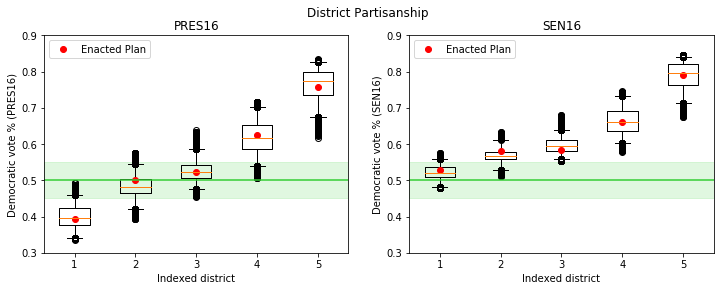

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
plt.suptitle("District Partisanship")

ax1.set_title("PRES16")
ax1.set_xlabel("Indexed district")
ax1.set_ylabel("Democratic vote % (PRES16)")
ax1.boxplot(partisan_cong["results_pres16"], whis=(1,99))
ax1.plot(range(1, 6), sorted(enact_cong["PRES16"].percents("Dem")), 
         marker="o", linewidth=0, color="red", label="Enacted Plan")
ax1.axhline(y=0.5, color="limegreen")
ax1.axhspan(0.45, 0.55, color="limegreen", alpha=0.15, zorder=0)

ax1.set_ylim(0.3, 0.9)

ax2.set_title("SEN16")
ax2.set_xlabel("Indexed district")
ax2.set_ylabel("Democratic vote % (SEN16)")
ax2.boxplot(partisan_cong["results_sen16"], whis=(1,99))
ax2.plot(range(1, 6), sorted(enact_cong["SEN16"].percents("Dem")), 
         marker="o", linewidth=0, color="red", label="Enacted Plan")
ax2.axhline(y=0.5, color="limegreen")
ax2.axhspan(0.45, 0.55, color="limegreen", alpha=0.15, zorder=0)
ax2.set_ylim(0.3, 0.9)

ax1.legend(loc="upper left")
ax2.legend(loc="upper left")
plt.savefig("plots/partisan_runs/congress/district_partisanship_100000.png",
            bbox_inches="tight", dpi=200)
plt.show()

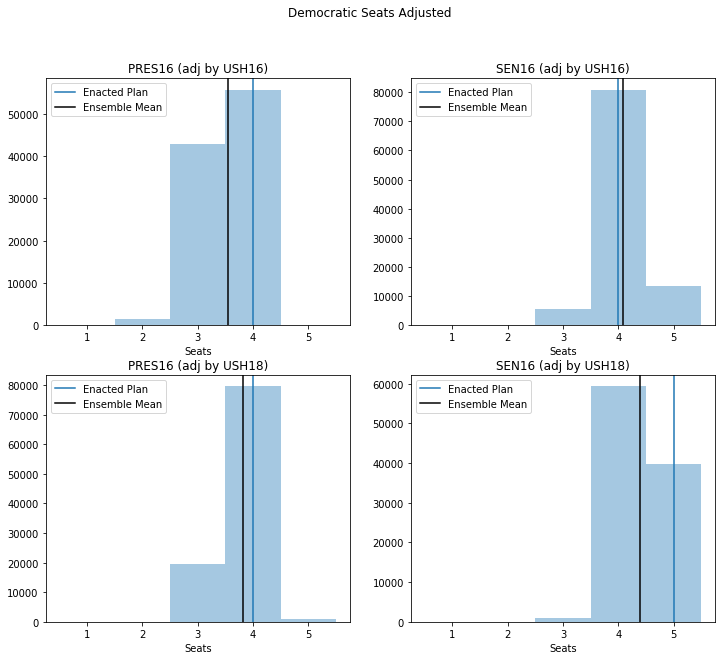

In [17]:
fig, axs = plt.subplots(2,2, figsize=(12,10))
plt.suptitle("Democratic Seats Adjusted")

for j, elect in enumerate(["PRES16", "SEN16"]):
    diffs = {"PRES16": [diff_c16_p16, diff_c18_p16], 
             "SEN16": [diff_c16_s16, diff_c18_s16]}
    for i, diff in enumerate(diffs[elect]):
        cong = "USH16" if i == 0 else "USH18"
        axs[i][j].set_title("{} (adj by {})".format(elect, cong))
        axs[i][j].set_xlabel("Seats")
        ls = list(map(np.sum, np.rint(partisan_cong["results_{}".format(elect.lower())] + diff)))
        sns.distplot(ls, ax=axs[i][j], kde=False, bins=np.arange(1,7)-0.5)
        axs[i][j].axvline(np.sum(np.rint(np.array(enact_cong[elect].percents("Dem")) + diff)),
            label="Enacted Plan")
        axs[i][j].axvline(np.mean(ls), color="k", label="Ensemble Mean")
        axs[i][j].legend()

plt.savefig("plots/partisan_runs/congress/adjusted_democratic_seats_100000.png",
            bbox_inches="tight", dpi=200)
plt.show()

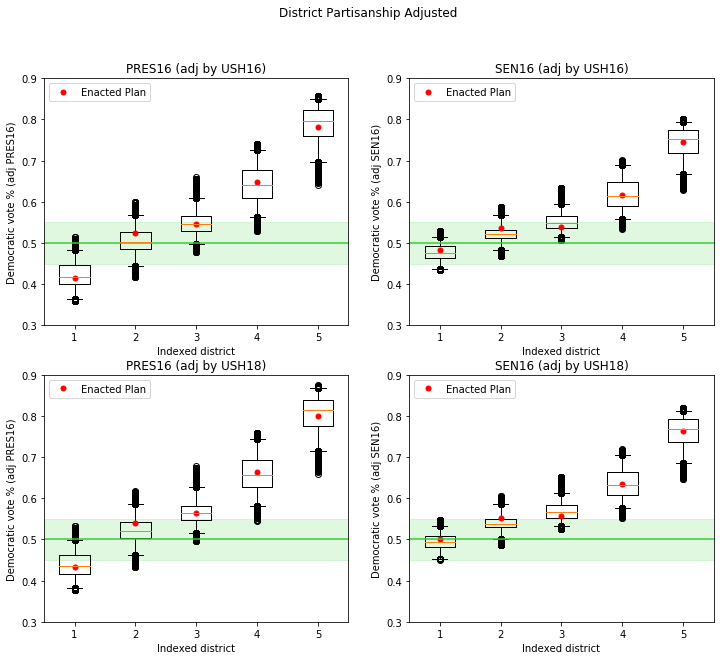

In [12]:
fig, axs = plt.subplots(2,2, figsize=(12,10))
plt.suptitle("District Partisanship Adjusted")

for j, elect in enumerate(["PRES16", "SEN16"]):
    diffs = {"PRES16": [diff_c16_p16, diff_c18_p16], 
             "SEN16": [diff_c16_s16, diff_c18_s16]}
    for i, diff in enumerate(diffs[elect]):
        cong = "USH16" if i == 0 else "USH18"
        axs[i][j].set_title("{} (adj by {})".format(elect, cong))
        axs[i][j].set_xlabel("Indexed district")
        axs[i][j].set_ylabel("Democratic vote % (adj {})".format(elect))
        axs[i][j].boxplot(partisan_cong["results_{}".format(elect.lower())] + diff, whis=(1,99))
        axs[i][j].plot(range(1, 6), sorted(np.array(enact_cong[elect].percents("Dem")) + diff), 
                 marker="o", linewidth=0, color="red", label="Enacted Plan", markersize=5)
        axs[i][j].axhline(y=0.5, color="limegreen")
        axs[i][j].axhspan(0.45, 0.55, color="limegreen", alpha=0.15, zorder=0)
        axs[i][j].set_ylim(0.3, 0.9)
        axs[i][j].legend(loc="upper left")

plt.savefig("plots/partisan_runs/congress/adjusted_district_partisanship_100000.png",
            bbox_inches="tight", dpi=200)
plt.show()

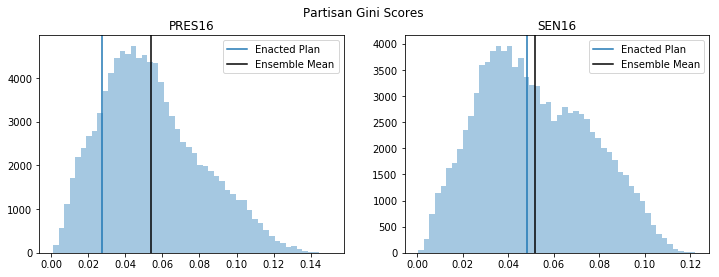

In [127]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
fig.suptitle("Partisan Gini Scores")
for i, e in enumerate(["PRES16", "SEN16"]):
    full = partisan_cong["partisan_gini_{}".format(e.lower())]
    axs[i].set_title(e)
    sns.distplot(full, ax=axs[i], kde=False)
    axs[i].axvline(enact_cong[e].partisan_gini(), label="Enacted Plan")
    axs[i].axvline(np.mean(full), color="k", label="Ensemble Mean")
    axs[i].legend()
plt.savefig("plots/partisan_runs/congress/partisan_gini_100000.png",
            bbox_inches="tight", dpi=200)

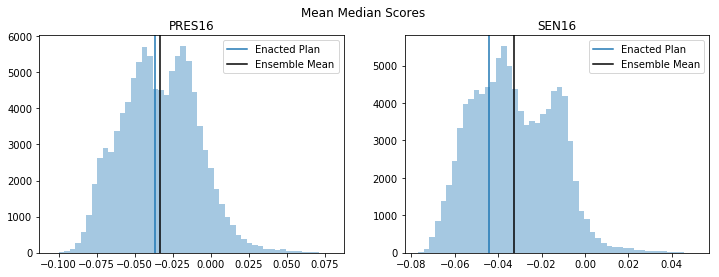

In [128]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
fig.suptitle("Mean Median Scores")
for i, e in enumerate(["PRES16", "SEN16"]):
    full = partisan_cong["mean_median_{}".format(e.lower())]
    axs[i].set_title(e)
    sns.distplot(full, ax=axs[i], kde=False)
    axs[i].axvline(enact_cong[e].mean_median(), label="Enacted Plan")
    axs[i].axvline(np.mean(full), color="k", label="Ensemble Mean")
    axs[i].legend()
plt.savefig("plots/partisan_runs/congress/mean_median_100000.png",
            bbox_inches="tight", dpi=200)

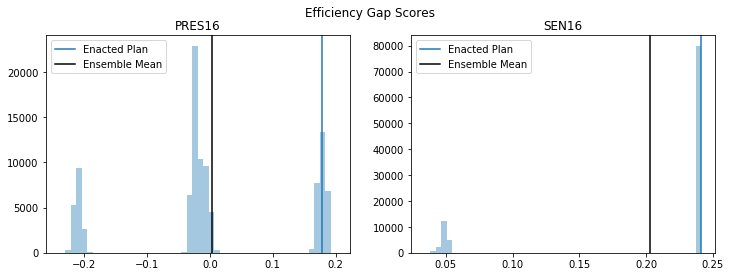

In [129]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
fig.suptitle("Efficiency Gap Scores")
for i, e in enumerate(["PRES16", "SEN16"]):
    full = partisan_cong["efficiency_gap_{}".format(e.lower())]
    axs[i].set_title(e)
    sns.distplot(full, ax=axs[i], kde=False)
    axs[i].axvline(enact_cong[e].efficiency_gap(), label="Enacted Plan")
    axs[i].axvline(np.mean(full), color="k", label="Ensemble Mean")
    axs[i].legend()
plt.savefig("plots/partisan_runs/congress/efficiency_gap_100000.png",
            bbox_inches="tight", dpi=200)

## Congressional 2020 (6 districts)

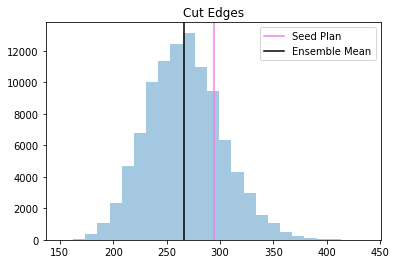

In [24]:
plt.title("Cut Edges")
sns.distplot(partisan_cong6["cutedges"], kde=False, bins=25)
plt.axvline(x=partisan_cong6["cutedges"][0], color="violet", label="Seed Plan")
plt.axvline(x=np.mean(partisan_cong6["cutedges"]), color="k", label="Ensemble Mean")
plt.legend()
plt.savefig("plots/partisan_runs/congress_2020/cut_edges_100000.png",
            bbox_inches="tight", dpi=200)
plt.show()

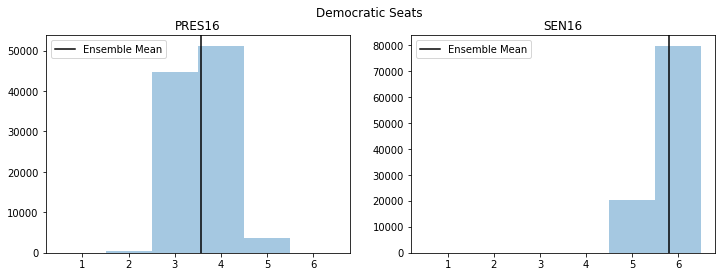

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
plt.suptitle("Democratic Seats")

ax1.set_title("PRES16")
sns.distplot(partisan_cong6["seats_pres16"], ax=ax1, kde=False, bins=np.arange(1,8)-0.5)
ax1.axvline(np.mean(partisan_cong6["seats_pres16"]), color="k", label="Ensemble Mean")

ax2.set_title("SEN16")
sns.distplot(partisan_cong6["seats_sen16"], ax=ax2, kde=False, bins=np.arange(1,8)-0.5)
ax2.axvline(np.mean(partisan_cong6["seats_sen16"]), color="k", label="Ensemble Mean")

ax1.legend()
ax2.legend()
plt.savefig("plots/partisan_runs/congress_2020/democratic_seats_100000.png",
            bbox_inches="tight", dpi=200)
plt.show()

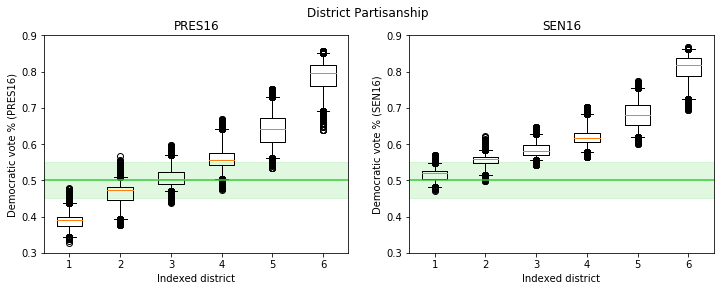

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
plt.suptitle("District Partisanship")

ax1.set_title("PRES16")
ax1.set_xlabel("Indexed district")
ax1.set_ylabel("Democratic vote % (PRES16)")
ax1.boxplot(partisan_cong6["results_pres16"], whis=(1,99))
ax1.axhline(y=0.5, color="limegreen")
ax1.axhspan(0.45, 0.55, color="limegreen", alpha=0.15, zorder=0)
ax1.set_ylim(0.3, 0.9)

ax2.set_title("SEN16")
ax2.set_xlabel("Indexed district")
ax2.set_ylabel("Democratic vote % (SEN16)")
ax2.boxplot(partisan_cong6["results_sen16"], whis=(1,99))
ax2.axhline(y=0.5, color="limegreen")
ax2.axhspan(0.45, 0.55, color="limegreen", alpha=0.15, zorder=0)
ax2.set_ylim(0.3, 0.9)

plt.savefig("plots/partisan_runs/congress_2020/district_partisanship_100000.png",
            bbox_inches="tight", dpi=200)
plt.show()

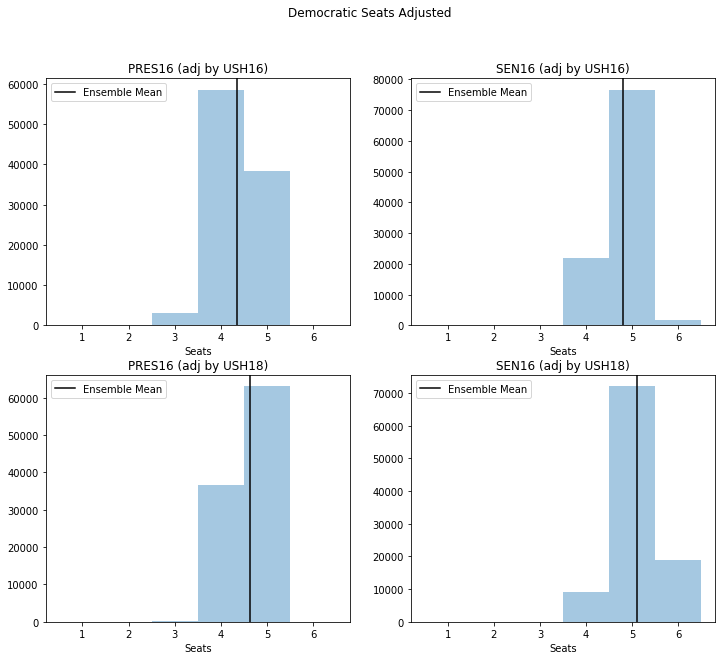

In [29]:
fig, axs = plt.subplots(2,2, figsize=(12,10))
plt.suptitle("Democratic Seats Adjusted")

for j, elect in enumerate(["PRES16", "SEN16"]):
    diffs = {"PRES16": [diff_c16_p16, diff_c18_p16], 
             "SEN16": [diff_c16_s16, diff_c18_s16]}
    for i, diff in enumerate(diffs[elect]):
        cong = "USH16" if i == 0 else "USH18"
        axs[i][j].set_title("{} (adj by {})".format(elect, cong))
        axs[i][j].set_xlabel("Seats")
        ls = list(map(np.sum, np.rint(partisan_cong6["results_{}".format(elect.lower())] + diff)))
        sns.distplot(ls, ax=axs[i][j], kde=False, bins=np.arange(1,8)-0.5)
        axs[i][j].axvline(np.mean(ls), color="k", label="Ensemble Mean")
        axs[i][j].legend()

plt.savefig("plots/partisan_runs/congress_2020/adjusted_democratic_seats_100000.png",
            bbox_inches="tight", dpi=200)
plt.show()

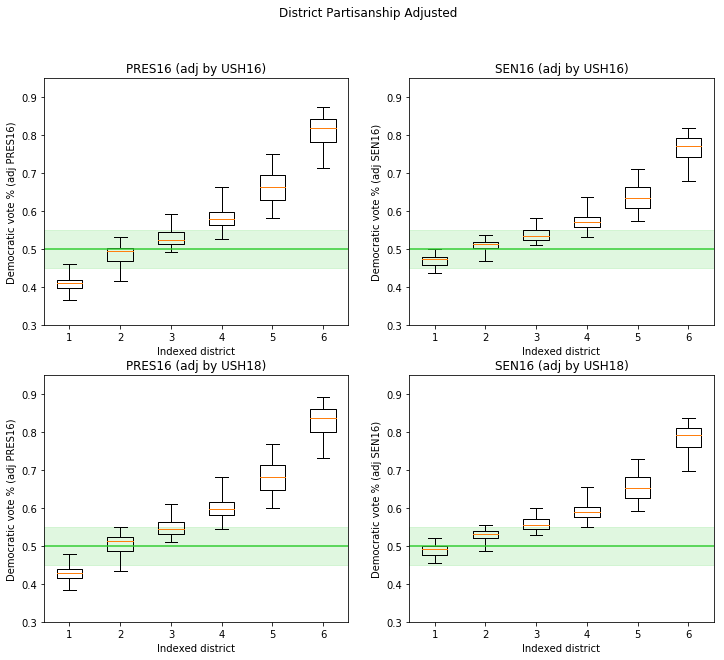

In [17]:
fig, axs = plt.subplots(2,2, figsize=(12,10))
plt.suptitle("District Partisanship Adjusted")

for j, elect in enumerate(["PRES16", "SEN16"]):
    diffs = {"PRES16": [diff_c16_p16, diff_c18_p16], 
             "SEN16": [diff_c16_s16, diff_c18_s16]}
    for i, diff in enumerate(diffs[elect]):
        cong = "USH16" if i == 0 else "USH18"
        axs[i][j].set_title("{} (adj by {})".format(elect, cong))
        axs[i][j].set_xlabel("Indexed district")
        axs[i][j].set_ylabel("Democratic vote % (adj {})".format(elect))
        axs[i][j].boxplot(partisan_cong6["results_{}".format(elect.lower())] + diff, whis=(1,99), showfliers=False)
        axs[i][j].axhline(y=0.5, color="limegreen")
        axs[i][j].axhspan(0.45, 0.55, color="limegreen", alpha=0.15, zorder=0)
        axs[i][j].set_ylim(0.3, 0.95)

plt.savefig("plots/partisan_runs/congress_2020/adjusted_district_partisanship_100000.png",
            bbox_inches="tight", dpi=200)
plt.show()

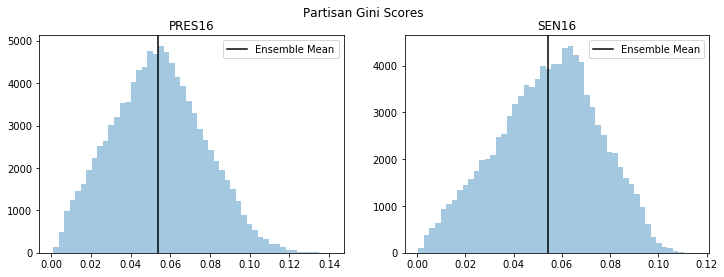

In [130]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
fig.suptitle("Partisan Gini Scores")
for i, e in enumerate(["PRES16", "SEN16"]):
    full = partisan_cong6["partisan_gini_{}".format(e.lower())]
    axs[i].set_title(e)
    sns.distplot(full, ax=axs[i], kde=False)
#     axs[i].axvline(enact_cong[e].partisan_gini(), label="Enacted Plan")
    axs[i].axvline(np.mean(full), color="k", label="Ensemble Mean")
    axs[i].legend()
plt.savefig("plots/partisan_runs/congress_2020/partisan_gini_100000.png",
            bbox_inches="tight", dpi=200)

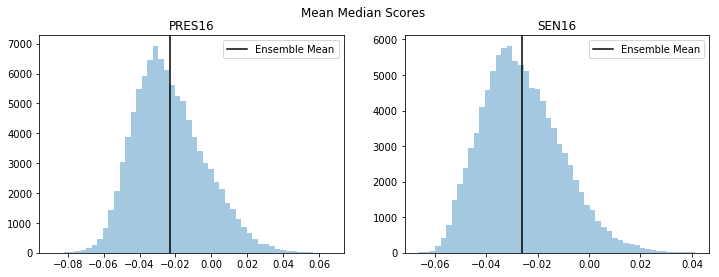

In [131]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
fig.suptitle("Mean Median Scores")
for i, e in enumerate(["PRES16", "SEN16"]):
    full = partisan_cong6["mean_median_{}".format(e.lower())]
    axs[i].set_title(e)
    sns.distplot(full, ax=axs[i], kde=False)
#     axs[i].axvline(enact_cong[e].mean_median(), label="Enacted Plan")
    axs[i].axvline(np.mean(full), color="k", label="Ensemble Mean")
    axs[i].legend()
plt.savefig("plots/partisan_runs/congress_2020/mean_median_100000.png",
            bbox_inches="tight", dpi=200)

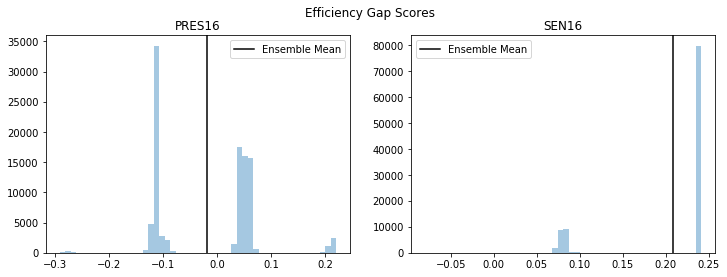

In [132]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
fig.suptitle("Efficiency Gap Scores")
for i, e in enumerate(["PRES16", "SEN16"]):
    full = partisan_cong6["efficiency_gap_{}".format(e.lower())]
    axs[i].set_title(e)
    sns.distplot(full, ax=axs[i], kde=False)
#     axs[i].axvline(enact_cong[e].efficiency_gap(), label="Enacted Plan")
    axs[i].axvline(np.mean(full), color="k", label="Ensemble Mean")
    axs[i].legend()
plt.savefig("plots/partisan_runs/congress_2020/efficiency_gap_100000.png",
            bbox_inches="tight", dpi=200)

## State Senate (30 districts)

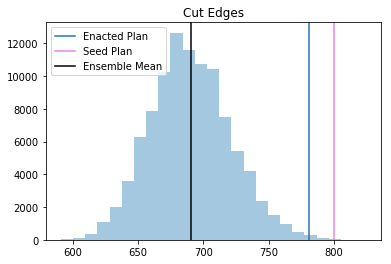

In [8]:
plt.title("Cut Edges")
sns.distplot(partisan_sen["cutedges"], kde=False, bins=25)
plt.axvline(x=len(enact_sen["cut_edges"]), label="Enacted Plan")
plt.axvline(x=partisan_sen["cutedges"][0], color="violet", label="Seed Plan")
plt.axvline(x=np.mean(partisan_sen["cutedges"]), color="k", label="Ensemble Mean")
plt.legend()
plt.savefig("plots/partisan_runs/state_senate/cut_edges_100000.png",
            bbox_inches="tight", dpi=200)
plt.show()

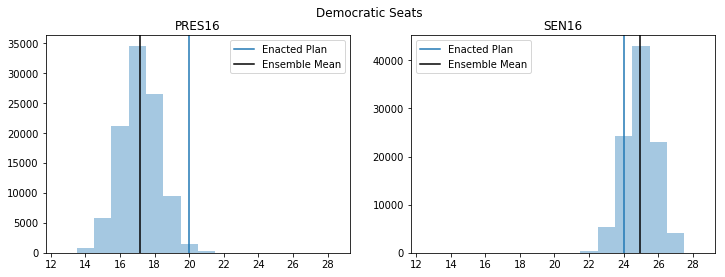

In [60]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
plt.suptitle("Democratic Seats")

ax1.set_title("PRES16")
sns.distplot(partisan_sen["seats_pres16"], ax=ax1, kde=False, bins=np.arange(13,30)-0.5)
ax1.axvline(enact_sen["PRES16"].seats("Dem"), label="Enacted Plan")
ax1.axvline(np.mean(partisan_sen["seats_pres16"]), color="k", label="Ensemble Mean")

ax2.set_title("SEN16")
sns.distplot(partisan_sen["seats_sen16"], ax=ax2, kde=False, bins=np.arange(13,30)-0.5)
ax2.axvline(enact_sen["SEN16"].seats("Dem"), label="Enacted Plan")
ax2.axvline(np.mean(partisan_sen["seats_sen16"]), color="k", label="Ensemble Mean")

ax1.legend()
ax2.legend()
plt.savefig("plots/partisan_runs/state_senate/democratic_seats_100000.png",
            bbox_inches="tight", dpi=200)
plt.show()

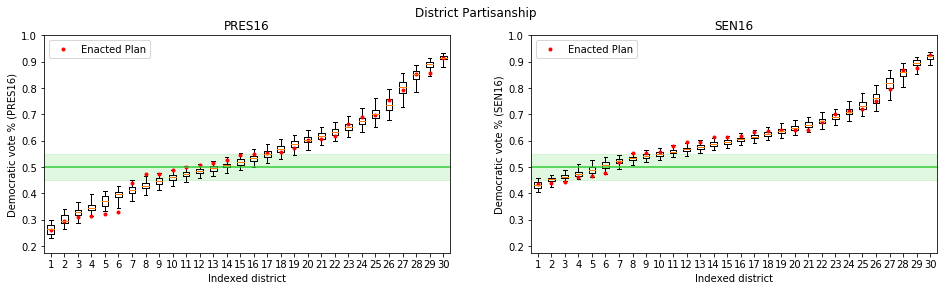

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))
plt.suptitle("District Partisanship")

ax1.set_title("PRES16")
ax1.set_xlabel("Indexed district")
ax1.set_ylabel("Democratic vote % (PRES16)")
ax1.boxplot(partisan_sen["results_pres16"], whis=(1,99),showfliers=False)
ax1.plot(range(1, 31), sorted(enact_sen["PRES16"].percents("Dem")), 
         marker="o", linewidth=0, color="red", label="Enacted Plan", markersize=3)
ax1.axhline(y=0.5, color="limegreen")
ax1.axhspan(0.45, 0.55, color="limegreen", alpha=0.15, zorder=0)
ax1.set_ylim(0.175, 1)

ax2.set_title("SEN16")
ax2.set_xlabel("Indexed district")
ax2.set_ylabel("Democratic vote % (SEN16)")
ax2.boxplot(partisan_sen["results_sen16"], whis=(1,99),showfliers=False)
ax2.plot(range(1, 31), sorted(enact_sen["SEN16"].percents("Dem")), 
         marker="o", linewidth=0, color="red", label="Enacted Plan", markersize=3)
ax2.axhline(y=0.5, color="limegreen")
ax2.axhspan(0.45, 0.55, color="limegreen", alpha=0.15, zorder=0)
ax2.set_ylim(0.175, 1)

ax1.legend(loc="upper left")
ax2.legend(loc="upper left")
plt.savefig("plots/partisan_runs/state_senate/district_partisanship_100000.png",
            bbox_inches="tight", dpi=200)
plt.show()

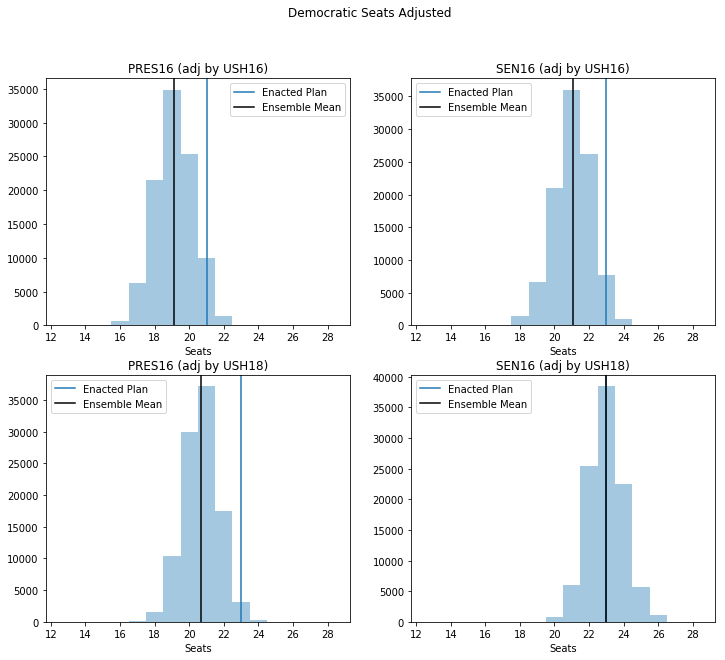

In [20]:
fig, axs = plt.subplots(2,2, figsize=(12,10))
plt.suptitle("Democratic Seats Adjusted")

for j, elect in enumerate(["PRES16", "SEN16"]):
    diffs = {"PRES16": [diff_c16_p16, diff_c18_p16], 
             "SEN16": [diff_c16_s16, diff_c18_s16]}
    for i, diff in enumerate(diffs[elect]):
        cong = "USH16" if i == 0 else "USH18"
        axs[i][j].set_title("{} (adj by {})".format(elect, cong))
        axs[i][j].set_xlabel("Seats")
        ls = list(map(np.sum, np.rint(partisan_sen["results_{}".format(elect.lower())] + diff)))
        sns.distplot(ls, ax=axs[i][j], kde=False, bins=np.arange(13,30)-0.5)
        axs[i][j].axvline(np.sum(np.rint(np.array(enact_sen[elect].percents("Dem")) + diff)),
            label="Enacted Plan")
        axs[i][j].axvline(np.mean(ls), color="k", label="Ensemble Mean")
        axs[i][j].legend()

plt.savefig("plots/partisan_runs/state_senate/adjusted_democratic_seats_100000.png",
            bbox_inches="tight", dpi=200)
plt.show()

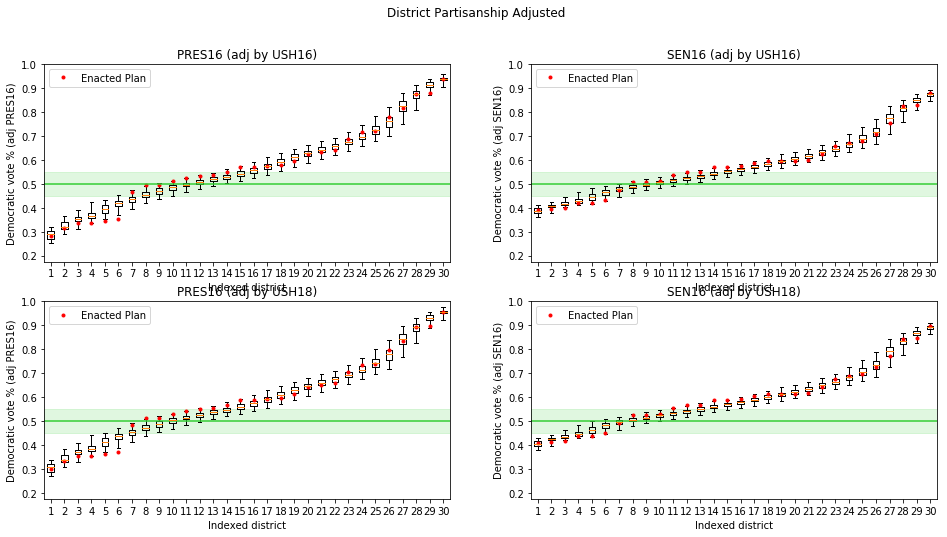

In [20]:
fig, axs = plt.subplots(2,2, figsize=(16,8))
plt.suptitle("District Partisanship Adjusted")

for j, elect in enumerate(["PRES16", "SEN16"]):
    diffs = {"PRES16": [diff_c16_p16, diff_c18_p16], 
             "SEN16": [diff_c16_s16, diff_c18_s16]}
    for i, diff in enumerate(diffs[elect]):
        cong = "USH16" if i == 0 else "USH18"
        axs[i][j].set_title("{} (adj by {})".format(elect, cong))
        axs[i][j].set_xlabel("Indexed district")
        axs[i][j].set_ylabel("Democratic vote % (adj {})".format(elect))
        axs[i][j].boxplot(partisan_sen["results_{}".format(elect.lower())] + diff, whis=(1,99), showfliers=False)
        axs[i][j].plot(range(1, 31), sorted(np.array(enact_sen[elect].percents("Dem")) + diff), 
                 marker="o", linewidth=0, color="red", label="Enacted Plan", markersize=3)
        axs[i][j].axhline(y=0.5, color="limegreen")
        axs[i][j].axhspan(0.45, 0.55, color="limegreen", alpha=0.15, zorder=0)
        axs[i][j].set_ylim(0.175, 1)
        axs[i][j].legend(loc="upper left")

plt.savefig("plots/partisan_runs/state_senate/adjusted_district_partisanship_100000.png",
            bbox_inches="tight", dpi=200)
plt.show()

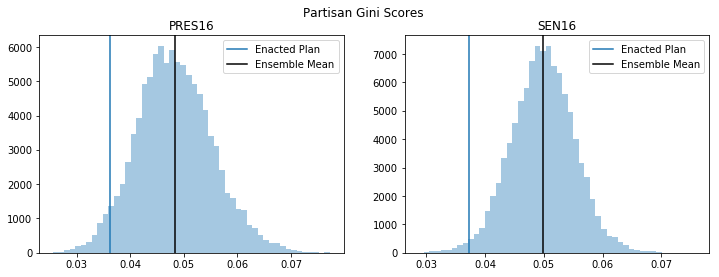

In [133]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
fig.suptitle("Partisan Gini Scores")
for i, e in enumerate(["PRES16", "SEN16"]):
    full = partisan_sen["partisan_gini_{}".format(e.lower())]
    axs[i].set_title(e)
    sns.distplot(full, ax=axs[i], kde=False)
    axs[i].axvline(enact_sen[e].partisan_gini(), label="Enacted Plan")
    axs[i].axvline(np.mean(full), color="k", label="Ensemble Mean")
    axs[i].legend()
plt.savefig("plots/partisan_runs/state_senate/partisan_gini_100000.png",
            bbox_inches="tight", dpi=200)

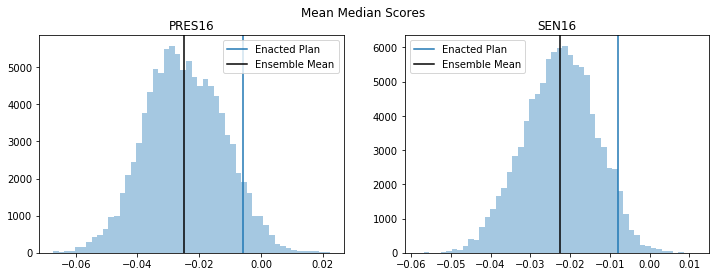

In [134]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
fig.suptitle("Mean Median Scores")
for i, e in enumerate(["PRES16", "SEN16"]):
    full = partisan_sen["mean_median_{}".format(e.lower())]
    axs[i].set_title(e)
    sns.distplot(full, ax=axs[i], kde=False)
    axs[i].axvline(enact_sen[e].mean_median(), label="Enacted Plan")
    axs[i].axvline(np.mean(full), color="k", label="Ensemble Mean")
    axs[i].legend()
plt.savefig("plots/partisan_runs/state_senate/mean_median_100000.png",
            bbox_inches="tight", dpi=200)

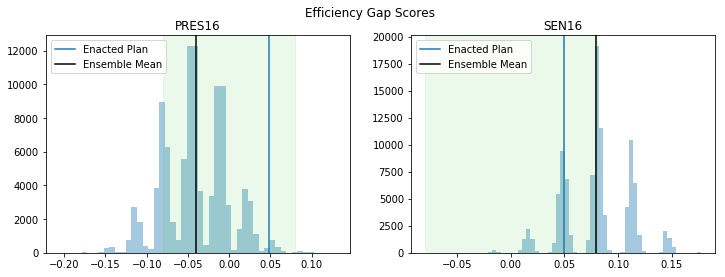

In [11]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
fig.suptitle("Efficiency Gap Scores")
for i, e in enumerate(["PRES16", "SEN16"]):
    full = partisan_sen["efficiency_gap_{}".format(e.lower())]
    axs[i].set_title(e)
    sns.distplot(full, ax=axs[i], kde=False)
    axs[i].axvline(enact_sen[e].efficiency_gap(), label="Enacted Plan")
    axs[i].axvline(np.mean(full), color="k", label="Ensemble Mean")
    axs[i].axvspan(-0.08, 0.08, color="limegreen", alpha=0.1)
    axs[i].legend()
plt.savefig("plots/partisan_runs/state_senate/efficiency_gap_100000.png",
            bbox_inches="tight", dpi=200)

## State House (60 districts)

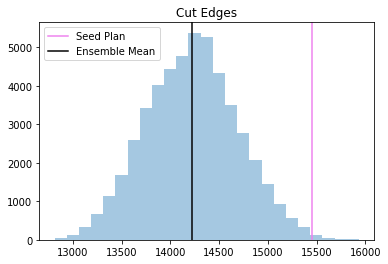

In [10]:
plt.title("Cut Edges")
sns.distplot(partisan_house_2["cutedges"], kde=False, bins=25)
# sns.distplot(partisan_house_5["cutedges"], kde=False, bins=25)
# plt.axvline(x=len(enact_house["cut_edges"]), label="Enacted Plan")
plt.axvline(x=partisan_house_2["cutedges"][0], color="violet", label="Seed Plan")
# plt.axvline(x=partisan_house_5["cutedges"][0], color="violet", label="Seed Plan 5")

plt.axvline(x=np.mean(partisan_house_2["cutedges"]), color="k", label="Ensemble Mean")
# plt.axvline(x=np.mean(partisan_house_5["cutedges"]), color="g", label="Ensemble Mean 5")

plt.legend()
# plt.savefig("plots/partisan_runs/state_house/cut_edges_100000.png",
#             bbox_inches="tight", dpi=200)
plt.show()

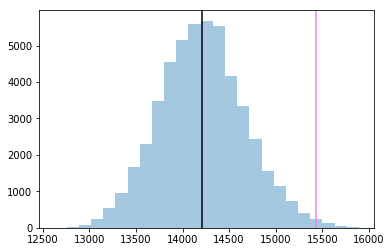

In [20]:
sns.distplot(partisan_house_5["cutedges"], kde=False, bins=25)
plt.axvline(x=partisan_house_5["cutedges"][0], color="violet", label="Seed Plan 2")
plt.axvline(x=np.mean(partisan_house_5["cutedges"]), color="k", label="Ensemble Mean 2")

In [14]:
max(partisan_house_2["seats_sen16"])

51.0

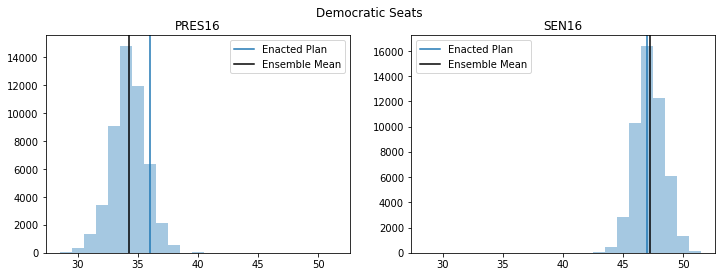

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
plt.suptitle("Democratic Seats")

ax1.set_title("PRES16")
# sns.distplot(partisan_house_5["seats_pres16"], ax=ax1, kde=False, bins=np.arange(30,53)-0.5)
sns.distplot(partisan_house_2["seats_pres16"], ax=ax1, kde=False, bins=np.arange(29,53)-0.5)

ax1.axvline(enact_house["PRES16"].seats("Dem"), label="Enacted Plan")
ax1.axvline(np.mean(partisan_house_2["seats_pres16"]), color="k", label="Ensemble Mean")

ax2.set_title("SEN16")
# sns.distplot(partisan_house_5["seats_sen16"], ax=ax2, kde=False, bins=np.arange(30,53)-0.5)
sns.distplot(partisan_house_2["seats_sen16"], ax=ax2, kde=False, bins=np.arange(29,53)-0.5)

ax2.axvline(enact_house["SEN16"].seats("Dem"), label="Enacted Plan")
ax2.axvline(np.mean(partisan_house_2["seats_sen16"]), color="k", label="Ensemble Mean")

ax1.legend()
ax2.legend()
plt.savefig("plots/partisan_runs/state_house/democratic_seats_100000.png",
            bbox_inches="tight", dpi=200)
plt.show()

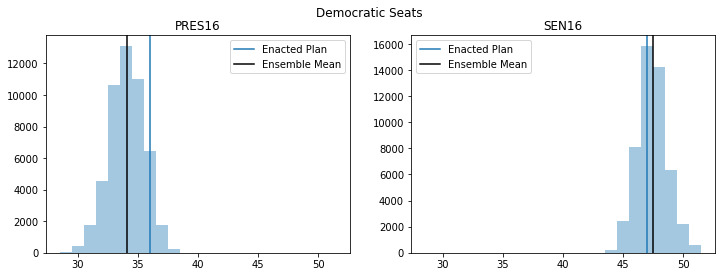

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
plt.suptitle("Democratic Seats")

ax1.set_title("PRES16")
sns.distplot(partisan_house_5["seats_pres16"], ax=ax1, kde=False, bins=np.arange(29,53)-0.5)
# sns.distplot(partisan_house_2["seats_pres16"], ax=ax1, kde=False, bins=np.arange(30,53)-0.5)

ax1.axvline(enact_house["PRES16"].seats("Dem"), label="Enacted Plan")
ax1.axvline(np.mean(partisan_house_5["seats_pres16"]), color="k", label="Ensemble Mean")

ax2.set_title("SEN16")
sns.distplot(partisan_house_5["seats_sen16"], ax=ax2, kde=False, bins=np.arange(29,53)-0.5)
# sns.distplot(partisan_house_2["seats_sen16"], ax=ax2, kde=False, bins=np.arange(30,53)-0.5)

ax2.axvline(enact_house["SEN16"].seats("Dem"), label="Enacted Plan")
ax2.axvline(np.mean(partisan_house_5["seats_sen16"]), color="k", label="Ensemble Mean")

ax1.legend()
ax2.legend()

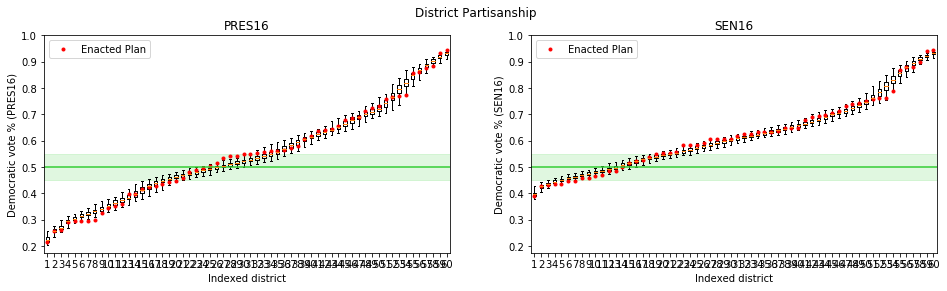

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))
plt.suptitle("District Partisanship")

ax1.set_title("PRES16")
ax1.set_xlabel("Indexed district")
ax1.set_ylabel("Democratic vote % (PRES16)")
ax1.boxplot(partisan_house_2["results_pres16"], whis=(1,99),showfliers=False)
ax1.plot(range(1, 61), sorted(enact_house["PRES16"].percents("Dem")), 
         marker="o", linewidth=0, color="red", label="Enacted Plan", markersize=3)
ax1.axhline(y=0.5, color="limegreen")
ax1.axhspan(0.45, 0.55, color="limegreen", alpha=0.15, zorder=0)
ax1.set_ylim(0.175, 1)

ax2.set_title("SEN16")
ax2.set_xlabel("Indexed district")
ax2.set_ylabel("Democratic vote % (SEN16)")
ax2.boxplot(partisan_house_2["results_sen16"], whis=(1,99),showfliers=False)
ax2.plot(range(1, 61), sorted(enact_house["SEN16"].percents("Dem")), 
         marker="o", linewidth=0, color="red", label="Enacted Plan", markersize=3)
ax2.axhline(y=0.5, color="limegreen")
ax2.axhspan(0.45, 0.55, color="limegreen", alpha=0.15, zorder=0)
ax2.set_ylim(0.175, 1)

ax1.legend(loc="upper left")
ax2.legend(loc="upper left")
plt.savefig("plots/partisan_runs/state_house/district_partisanship_100000.png",
            bbox_inches="tight", dpi=200)
plt.show()

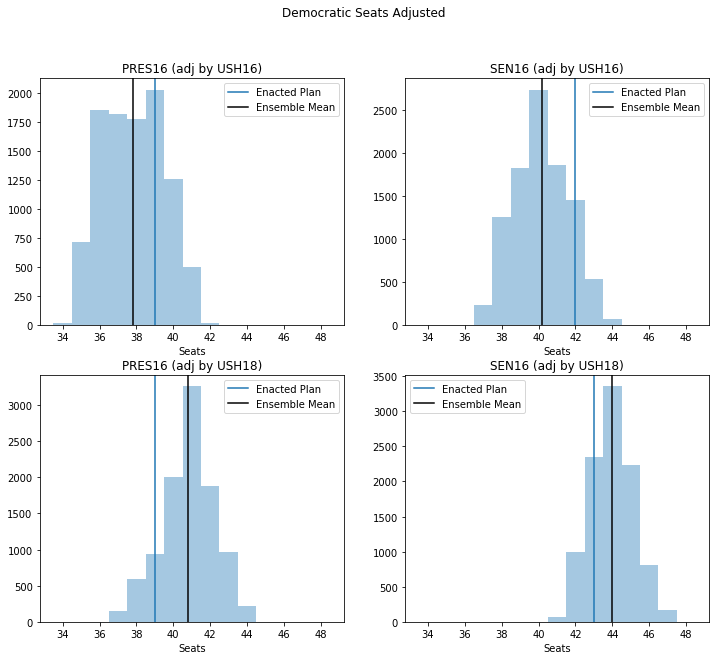

In [18]:
fig, axs = plt.subplots(2,2, figsize=(12,10))
plt.suptitle("Democratic Seats Adjusted")

for j, elect in enumerate(["PRES16", "SEN16"]):
    diffs = {"PRES16": [diff_c16_p16, diff_c18_p16], 
             "SEN16": [diff_c16_s16, diff_c18_s16]}
    for i, diff in enumerate(diffs[elect]):
        cong = "USH16" if i == 0 else "USH18"
        axs[i][j].set_title("{} (adj by {})".format(elect, cong))
        axs[i][j].set_xlabel("Seats")
        ls = list(map(np.sum, np.rint(partisan_house_2["results_{}".format(elect.lower())] + diff)))
        sns.distplot(ls, ax=axs[i][j], kde=False, bins=np.arange(34, 50)-0.5)
        axs[i][j].axvline(np.sum(np.rint(np.array(enact_house[elect].percents("Dem")) + diff)),
            label="Enacted Plan")
        axs[i][j].axvline(np.mean(ls), color="k", label="Ensemble Mean")
        axs[i][j].legend()

plt.savefig("plots/partisan_runs/state_house/adjusted_democratic_seats_100000.png",
            bbox_inches="tight", dpi=200)
plt.show()

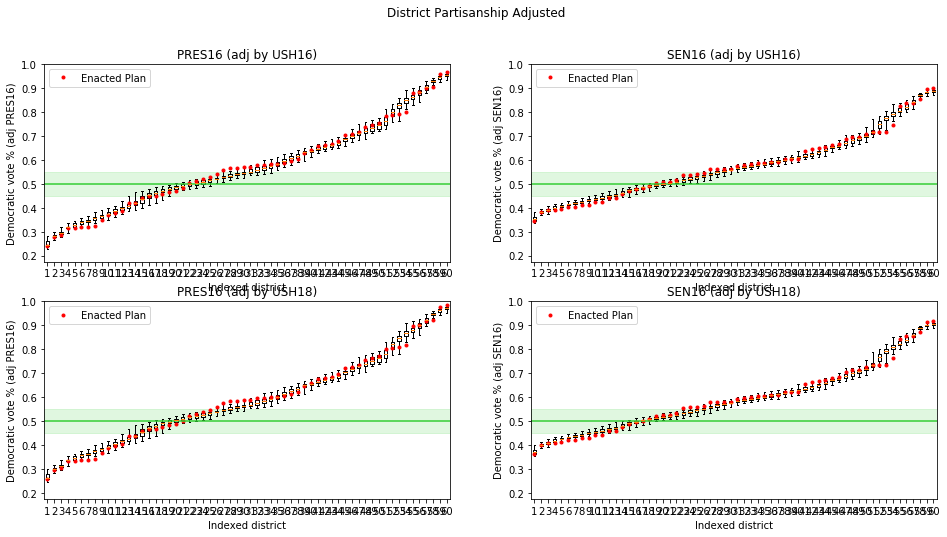

In [19]:
fig, axs = plt.subplots(2,2, figsize=(16,8))
plt.suptitle("District Partisanship Adjusted")

for j, elect in enumerate(["PRES16", "SEN16"]):
    diffs = {"PRES16": [diff_c16_p16, diff_c18_p16], 
             "SEN16": [diff_c16_s16, diff_c18_s16]}
    for i, diff in enumerate(diffs[elect]):
        cong = "USH16" if i == 0 else "USH18"
        axs[i][j].set_title("{} (adj by {})".format(elect, cong))
        axs[i][j].set_xlabel("Indexed district")
        axs[i][j].set_ylabel("Democratic vote % (adj {})".format(elect))
        axs[i][j].boxplot(partisan_house_2["results_{}".format(elect.lower())] + diff, whis=(1,99), showfliers=False)
        axs[i][j].plot(range(1, 61), sorted(np.array(enact_house[elect].percents("Dem")) + diff), 
                 marker="o", linewidth=0, color="red", label="Enacted Plan", markersize=3)
        axs[i][j].axhline(y=0.5, color="limegreen")
        axs[i][j].axhspan(0.45, 0.55, color="limegreen", alpha=0.15, zorder=0)
        axs[i][j].set_ylim(0.175, 1)
        axs[i][j].legend(loc="upper left")

plt.savefig("plots/partisan_runs/state_house/adjusted_district_partisanship_100000.png",
            bbox_inches="tight", dpi=200)
plt.show()

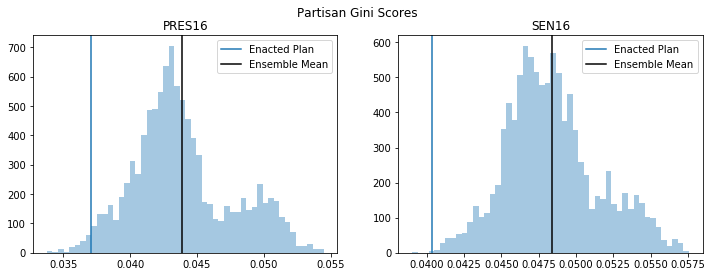

In [20]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
fig.suptitle("Partisan Gini Scores")
for i, e in enumerate(["PRES16", "SEN16"]):
    full = partisan_house_2["partisan_gini_{}".format(e.lower())]
    axs[i].set_title(e)
    sns.distplot(full, ax=axs[i], kde=False)
    axs[i].axvline(enact_house[e].partisan_gini(), label="Enacted Plan")
    axs[i].axvline(np.mean(full), color="k", label="Ensemble Mean")
    axs[i].legend()
plt.savefig("plots/partisan_runs/state_house/partisan_gini_100000.png",
            bbox_inches="tight", dpi=200)

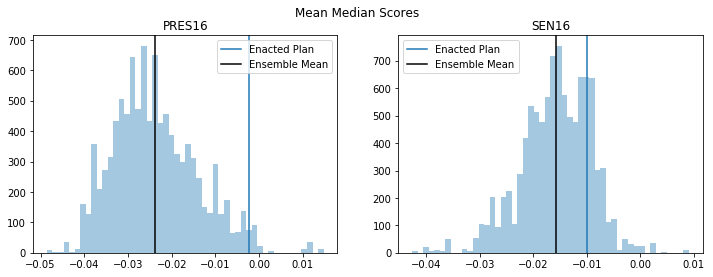

In [21]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
fig.suptitle("Mean Median Scores")
for i, e in enumerate(["PRES16", "SEN16"]):
    full = partisan_house_2["mean_median_{}".format(e.lower())]
    axs[i].set_title(e)
    sns.distplot(full, ax=axs[i], kde=False)
    axs[i].axvline(enact_house[e].mean_median(), label="Enacted Plan")
    axs[i].axvline(np.mean(full), color="k", label="Ensemble Mean")
    axs[i].legend()
plt.savefig("plots/partisan_runs/state_house/mean_median_100000.png",
            bbox_inches="tight", dpi=200)

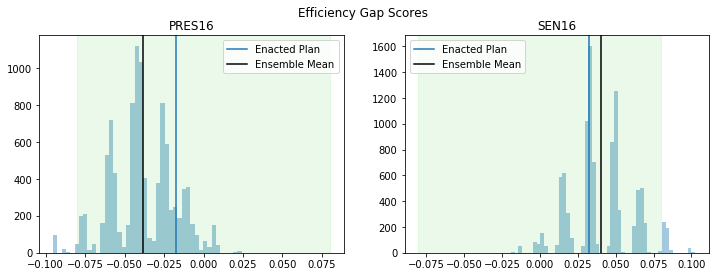

In [12]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
fig.suptitle("Efficiency Gap Scores")
for i, e in enumerate(["PRES16", "SEN16"]):
    full = partisan_house_2["efficiency_gap_{}".format(e.lower())]
    axs[i].set_title(e)
    sns.distplot(full, ax=axs[i], kde=False)
    axs[i].axvline(enact_house[e].efficiency_gap(), label="Enacted Plan")
    axs[i].axvline(np.mean(full), color="k", label="Ensemble Mean")
    axs[i].axvspan(-0.08, 0.08, color="limegreen", alpha=0.1)
    axs[i].legend()
plt.savefig("plots/partisan_runs/state_house/efficiency_gap_100000.png",
            bbox_inches="tight", dpi=200)

## Visualize Partisan Metrics

In [7]:
def extend_data_frame(df, data, key_prefix, col, districts,
                      elections=["PRES16", "SEN16"], iters=100000):
    for elect in elections:
        key = key_prefix.format(elect.lower())
        df = pd.concat([df, pd.DataFrame(np.array([data[key], [elect]*iters, [districts]*iters]).T,
                                         columns=[col, "Election", "Districts"])], ignore_index=True)
    return df

In [20]:
a = pd.DataFrame()
## CONG
a = extend_data_frame(a, partisan_cong, "efficiency_gap_{}", "EG", 5)

## CONG 6
a = extend_data_frame(a, partisan_cong6, "efficiency_gap_{}", "EG", 6)
    
## SENATE
a = extend_data_frame(a, partisan_sen, "efficiency_gap_{}", "EG", 30)

## House
a = extend_data_frame(a, partisan_house_2, "efficiency_gap_{}", "EG", 60, iters=50000)

a["EG"] = a["EG"].apply(float)
a["Districts"] = a["Districts"].apply(int)

In [21]:
b = pd.DataFrame()
## CONG
b = extend_data_frame(b, partisan_cong, "partisan_gini_{}", "PG", 5)

## CONG 6
b = extend_data_frame(b, partisan_cong6, "partisan_gini_{}", "PG", 6)
    
## SENATE
b = extend_data_frame(b, partisan_sen, "partisan_gini_{}", "PG", 30)

## House
b = extend_data_frame(b, partisan_house_2, "partisan_gini_{}", "PG", 60, iters=50000)

b["PG"] = b["PG"].apply(float)
b["Districts"] = b["Districts"].apply(int)

In [22]:
c = pd.DataFrame()
## CONG
c = extend_data_frame(c, partisan_cong, "mean_median_{}", "MM", 5)

## CONG 6
c = extend_data_frame(c, partisan_cong6, "mean_median_{}", "MM", 6)
    
## SENATE
c = extend_data_frame(c, partisan_sen, "mean_median_{}", "MM", 30)

## House
c = extend_data_frame(c, partisan_house_2, "mean_median_{}", "MM", 60, iters=50000)

c["MM"] = c["MM"].apply(float)
c["Districts"] = c["Districts"].apply(int)

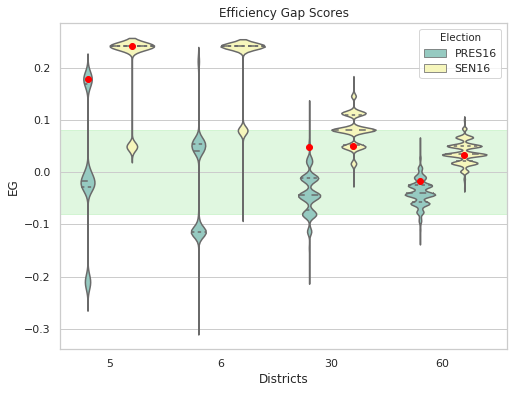

In [23]:
## Efficiency Gap Violin plot
sns.set(style="whitegrid", palette="Set3")
plt.figure(figsize=(8,6))
plt.title("Efficiency Gap Scores")
sns.violinplot(x="Districts", y="EG", hue="Election", data=a, inner="quartile")
# plt.axhline(0.0, color="green", zorder=0)
plt.axhspan(-0.08, 0.08, color="limegreen", alpha=0.15, zorder=0)
plt.plot([-0.20],enact_cong["PRES16"].efficiency_gap(), marker="o", color="r")
plt.plot([0.2],enact_cong["SEN16"].efficiency_gap(), marker="o", color="r")
plt.plot([1.8],enact_sen["PRES16"].efficiency_gap(), marker="o", color="r")
plt.plot([2.2],enact_sen["SEN16"].efficiency_gap(), marker="o", color="r")
plt.plot([2.8],enact_house["PRES16"].efficiency_gap(), marker="o", color="r")
plt.plot([3.2],enact_house["SEN16"].efficiency_gap(), marker="o", color="r")
plt.savefig("plots/partisan_runs/partisanship/efficiency_gap_violinplots.png",
            bbox_inches="tight", dpi=200)
plt.show()

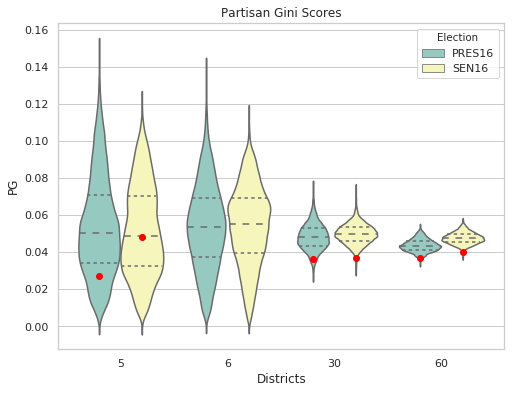

In [24]:
## Partisan Gini Violin plot
sns.set(style="whitegrid", palette="Set3")
plt.figure(figsize=(8,6))
plt.title("Partisan Gini Scores")
sns.violinplot(x="Districts", y="PG", hue="Election", data=b, inner="quartile")
# plt.axhline(0.0, color="green", zorder=0)
# plt.axhspan(-0.07, 0.07, color="limegreen", alpha=0.15, zorder=0)
plt.plot([-0.20],enact_cong["PRES16"].partisan_gini(), marker="o", color="r")
plt.plot([0.2],enact_cong["SEN16"].partisan_gini(), marker="o", color="r")
plt.plot([1.8],enact_sen["PRES16"].partisan_gini(), marker="o", color="r")
plt.plot([2.2],enact_sen["SEN16"].partisan_gini(), marker="o", color="r")
plt.plot([2.8],enact_house["PRES16"].partisan_gini(), marker="o", color="r")
plt.plot([3.2],enact_house["SEN16"].partisan_gini(), marker="o", color="r")
plt.savefig("plots/partisan_runs/partisanship/partisan_gini_violinplots.png",
            bbox_inches="tight", dpi=200)
plt.show()

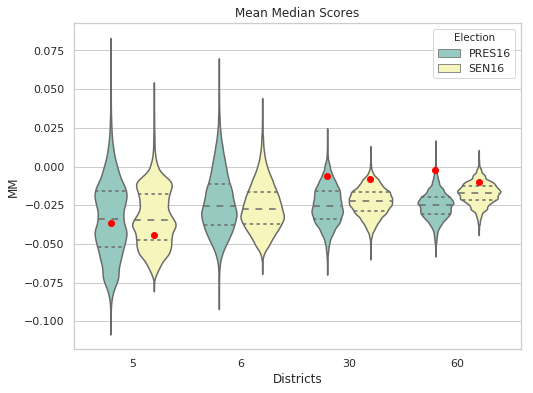

In [25]:
## Mean Median Violin plot
sns.set(style="whitegrid", palette="Set3")
plt.figure(figsize=(8,6))
plt.title("Mean Median Scores")
sns.violinplot(x="Districts", y="MM", hue="Election", data=c, inner="quartile")
# plt.axhline(0.0, color="green", zorder=0)
# plt.axhspan(-0.07, 0.07, color="limegreen", alpha=0.15, zorder=0)
plt.plot([-0.20],enact_cong["PRES16"].mean_median(), marker="o", color="r")
plt.plot([0.2],enact_cong["SEN16"].mean_median(), marker="o", color="r")
plt.plot([1.8],enact_sen["PRES16"].mean_median(), marker="o", color="r")
plt.plot([2.2],enact_sen["SEN16"].mean_median(), marker="o", color="r")
plt.plot([2.8],enact_house["PRES16"].mean_median(), marker="o", color="r")
plt.plot([3.2],enact_house["SEN16"].mean_median(), marker="o", color="r")
plt.savefig("plots/partisan_runs/partisanship/mean_median_violinplots.png",
            bbox_inches="tight", dpi=200)
plt.show()

## Misc

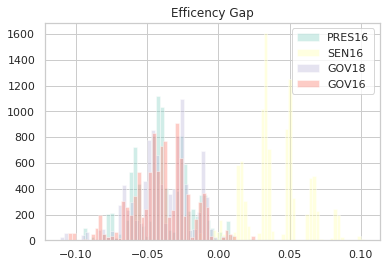

In [30]:
plt.figure()
plt.title("Efficency Gap")
sns.distplot(partisan_house_2["efficiency_gap_pres16"], kde=False, label="PRES16")
sns.distplot(partisan_house_2["efficiency_gap_sen16"], kde=False, label="SEN16")
sns.distplot(partisan_house_2["efficiency_gap_gov18"], kde=False, label="GOV18")
# sns.distplot(partisan_sen["efficiency_gap_ag16"], kde=False, label="AG16")
# sns.distplot(partisan_sen["efficiency_gap_sos16"], kde=False, label="SOS16")
sns.distplot(partisan_house_2["efficiency_gap_gov16"], kde=False, label="GOV16")
plt.legend()
plt.show()

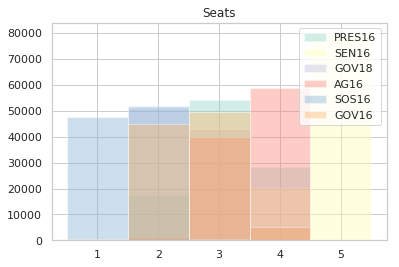

In [32]:
plt.figure()
plt.title("Seats")
sns.distplot(partisan_cong["seats_pres16"], kde=False, label="PRES16",bins=np.arange(1,7)-0.5)
sns.distplot(partisan_cong["seats_sen16"], kde=False, label="SEN16",bins=np.arange(1,7)-0.5)
sns.distplot(partisan_cong["seats_gov18"], kde=False, label="GOV18",bins=np.arange(1,7)-0.5)
sns.distplot(partisan_cong["seats_ag16"], kde=False, label="AG16",bins=np.arange(1,7)-0.5)
sns.distplot(partisan_cong["seats_sos16"], kde=False, label="SOS16",bins=np.arange(1,7)-0.5)
sns.distplot(partisan_cong["seats_gov16"], kde=False, label="GOV16",bins=np.arange(1,7)-0.5)
plt.legend()
plt.show()

In [8]:
sen = np.load("data/OR_state_senate_100000.p")
cong = np.load("data/OR_congress_100000.p")
cong6 = np.load("data/OR_congress_2020_100000.p")
house = np.load("data/OR_state_house_10000_blocks_0.02%.p")

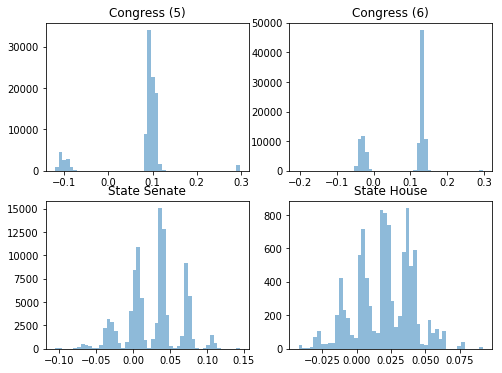

In [42]:
fig, axs = plt.subplots(2,2, figsize=(8,6))
axs[0][0].set_title("Congress (5)")
axs[0][0].hist(cong["efficiency_gap_ush18"], histtype="stepfilled", bins=50, alpha=0.5)
axs[0][1].set_title("Congress (6)")
axs[0][1].hist(cong6["efficiency_gap_ush18"], histtype="stepfilled", bins=50, alpha=0.5)
axs[1][0].set_title("State Senate")
axs[1][0].hist(sen["efficiency_gap_ush18"], histtype="stepfilled", bins=50, alpha=0.5)
axs[1][1].set_title("State House")
axs[1][1].hist(house["efficiency_gap_ush18"], histtype="stepfilled", bins=50, alpha=0.5)
plt.show()

In [56]:
elections = ["PRES16", "SEN16", "GOV18", "GOV16", "AG16", "SOS16"]

In [57]:
eg = pd.DataFrame()
eg = extend_data_frame(eg, partisan_cong, "efficiency_gap_{}", "EG", 5, elections=elections)
eg = extend_data_frame(eg, cong, "efficiency_gap_{}", "EG", 5, elections=["USH18"])
eg = extend_data_frame(eg, partisan_cong6, "efficiency_gap_{}", "EG", 6, elections=elections)
eg = extend_data_frame(eg, cong6, "efficiency_gap_{}", "EG", 6, elections=["USH18"])
eg = extend_data_frame(eg, partisan_sen, "efficiency_gap_{}", "EG", 30, elections=elections)
eg = extend_data_frame(eg, sen, "efficiency_gap_{}", "EG", 30, elections=["USH18"])
eg = extend_data_frame(eg, partisan_house_2, "efficiency_gap_{}", "EG", 60, elections=elections, 
                       iters=50000)
eg = extend_data_frame(eg, house, "efficiency_gap_{}", "EG", 60, 
                       elections=["USH18"], iters=10000)


eg["EG"] = eg["EG"].apply(float)
eg["Districts"] = eg["Districts"].apply(int)

In [24]:
mm = pd.DataFrame()
mm = extend_data_frame(mm, partisan_cong, "mean_median_{}", "MM", 5, elections=elections)
mm = extend_data_frame(mm, partisan_cong6, "mean_median_{}", "MM", 6, elections=elections)
mm = extend_data_frame(mm, partisan_sen, "mean_median_{}", "MM", 30, elections=elections)
mm = extend_data_frame(mm, partisan_house_2, "mean_median_{}", "MM", 60, elections=elections, 
                       iters=10000)

mm["MM"] = mm["MM"].apply(float)
mm["Districts"] = mm["Districts"].apply(int)

In [25]:
pg = pd.DataFrame()
pg = extend_data_frame(pg, partisan_cong, "partisan_gini_{}", "PG", 5, elections=elections)
pg = extend_data_frame(pg, partisan_cong6, "partisan_gini_{}", "PG", 6, elections=elections)
pg = extend_data_frame(pg, partisan_sen, "partisan_gini_{}", "PG", 30, elections=elections)
pg = extend_data_frame(pg, partisan_house_2, "partisan_gini_{}", "PG", 60, elections=elections,
                      iters=10000)

pg["PG"] = pg["PG"].apply(float)
pg["Districts"] = pg["Districts"].apply(int)

In [53]:
print(enact_sen["PRES16"].efficiency_gap())
print(enact_sen["SEN16"].efficiency_gap())
print(enact_sen["USH18"].efficiency_gap())
print(enact_sen["GOV18"].efficiency_gap())
print(enact_sen["GOV16"].efficiency_gap())
print(enact_sen["AG16"].efficiency_gap())
print(enact_sen["SOS16"].efficiency_gap())

0.04782632085352329
0.0501288274566186
0.10868973657312056
-0.029680717650784286
-0.011375973462986267
0.06707772374984819
-0.015152136567851526


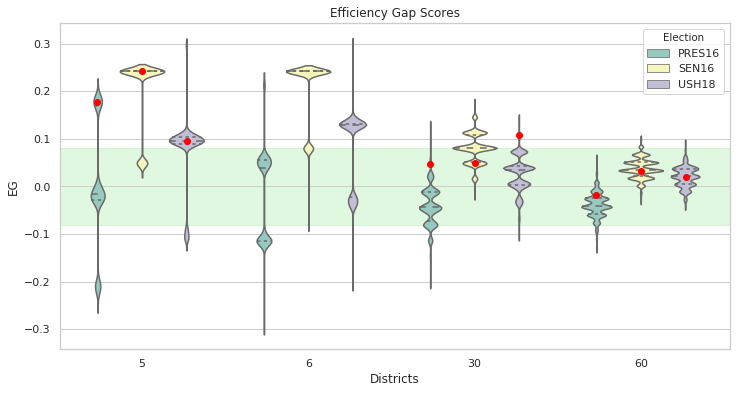

In [58]:
sns.set(style="whitegrid", palette="Set3")
es = ["PRES16", "SEN16", "USH18"]
plt.figure(figsize=(12,6))
plt.title("Efficiency Gap Scores")
sns.violinplot(x="Districts", y="EG", hue="Election", hue_order=es, 
               data=eg, inner="quartile")
plt.axhspan(-0.08, 0.08, color="limegreen", alpha=0.15, zorder=0)

for i in range(-1,2):
    plt.plot([0 + i*0.270],enact_cong[es[i+1]].efficiency_gap(), marker="o", color="red")
    plt.plot([2 + i*0.270],enact_sen[es[i+1]].efficiency_gap(), marker="o", color="red")
    plt.plot([3 + i*0.270],enact_house[es[i+1]].efficiency_gap(), marker="o", color="red")

# plt.scatter([],[], marker="o", color="red", label="Enacted Plan")
# plt.legend()

# plt.savefig("plots/partisan_runs/partisanship/efficiency_gap_all_elects_w_ush18.png",
#             bbox_inches="tight", dpi=200)
# plt.savefig("plots/USH18_efficiency_gap.png", bbox_inches="tight", dpi=200)

plt.show()

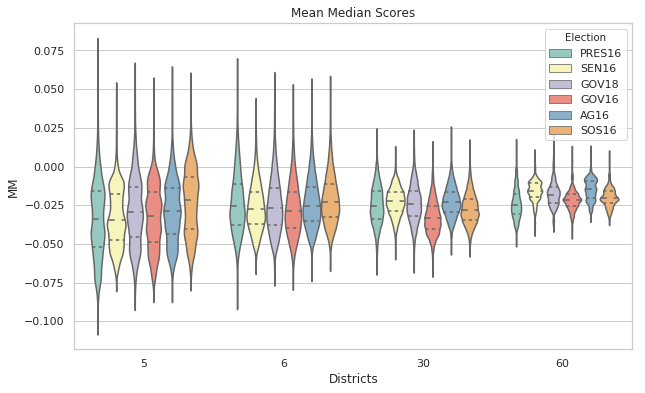

In [26]:
plt.figure(figsize=(10,6))
plt.title("Mean Median Scores")
sns.violinplot(x="Districts", y="MM", hue="Election", data=mm, inner="quartile")
plt.savefig("plots/partisan_runs/partisanship/mean_median_all_elects.png",
            bbox_inches="tight", dpi=200)
plt.show()

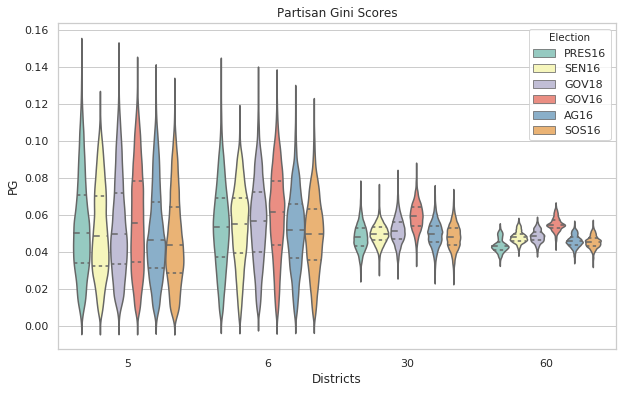

In [27]:
plt.figure(figsize=(10,6))
plt.title("Partisan Gini Scores")
sns.violinplot(x="Districts", y="PG", hue="Election", data=pg, inner="quartile")
plt.savefig("plots/partisan_runs/partisanship/partisan_gini_all_elects.png",
            bbox_inches="tight", dpi=200)
plt.show()

In [59]:
eg_sen = partisan_sen["efficiency_gap_sen16"]

In [61]:
eg_gov = partisan_sen["efficiency_gap_gov16"]

In [66]:
eg_pres = partisan_sen["efficiency_gap_pres16"]

In [67]:
np.sum(np.logical_and(eg_sen > 0.08, eg_pres < -0.08))

11757

In [68]:
np.sum(np.logical_and(np.logical_and(eg_sen > 0.08, eg_gov < -0.08), eg_pres < -0.08))

7556